In [1]:
import sys
sys.path.append('../..')

## Load trained model

In [2]:
from autoencoder_mnist import AutoEncoder

checkpoint_path = '../../lightning_logs/autoencoder/version_0/checkpoints/epoch=120-step=226874.ckpt'
model = AutoEncoder.load_from_checkpoint(checkpoint_path)
model.eval()

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.01)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): LeakyReLU(negative_slope=0.01)
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.

In [3]:
model.encoder

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): LeakyReLU(negative_slope=0.01)
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.25, inplace=False)
  (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (9): LeakyReLU(negative_slope=0.01)
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.25, inplace=False)
  (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): LeakyReLU(negative_slope=0.01)
  (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Dropout(p=0.25, inplace=False)
  (16): Flatten(start_dim=1, end_dim=-1

In [4]:
model.dec_input_layer

Linear(in_features=2, out_features=3136, bias=True)

## Load test data

In [5]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

val_dataset = MNIST(root='../../data', train=False, transform=transforms.ToTensor(), download=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=10, shuffle=True)

In [6]:
imgs, labels = next(iter(val_loader))
imgs.shape, labels

(torch.Size([10, 1, 28, 28]), tensor([7, 4, 1, 5, 1, 2, 4, 9, 9, 4]))

## Reconstruction

In [7]:
z_points = model.encoder(imgs)
z_points.shape

torch.Size([10, 2])

In [8]:
z = model.dec_input_layer(z_points)
z = z.view(-1, 64, 7, 7)
recon_imgs = model.decoder(z)
recon_imgs.shape

torch.Size([10, 1, 28, 28])

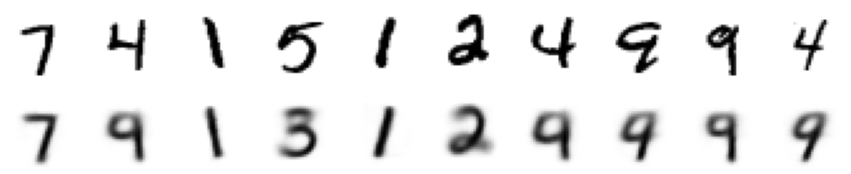

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 3))

for i in range(10):
    img = imgs[i].squeeze()
    ax = fig.add_subplot(2, 10, i + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

for i in range(10):
    img = recon_imgs[i].squeeze().detach().numpy()
    ax = fig.add_subplot(2, 10, i + 10 + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## Latent space

In [10]:
val_loader = DataLoader(dataset=val_dataset, batch_size=5000, shuffle=True)
imgs, labels = next(iter(val_loader))
imgs.shape, labels.shape

(torch.Size([5000, 1, 28, 28]), torch.Size([5000]))

In [11]:
z_points = model.encoder(imgs).detach().numpy()
z_points.shape

(5000, 2)

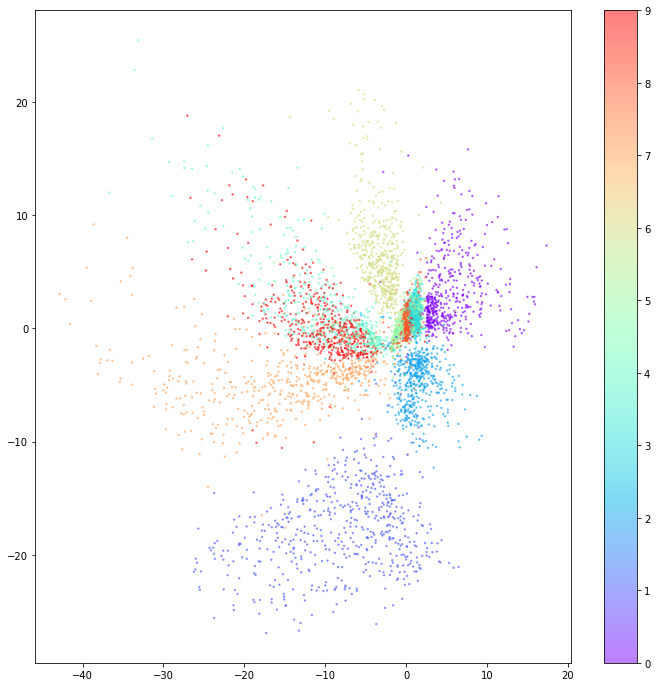

In [13]:
plt.figure(figsize=(12, 12))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap='rainbow', c=labels, alpha=0.5, s=2)
plt.colorbar()
plt.show()